In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data                    =   pd.read_csv('./ProcessedDataSet/resutT.csv')
questions               =   data['Title'].values
cmodel                  =   joblib.load('./TrainedModels/ClusterModel.pkl') 

In [3]:
data.head()

,Id,AcceptedAnswerId,QCreationDate,Title,Tags,Body,BLen,NTags,TLen,ACreationDate,Tdelta,ATime
0,1,20,2011-08-16 19:13:36.950,How do I improve LMS / NLMS filter performance?,<adaptive-filters><performance><least-squares>,<p>Are there ways to increase computational pe...,479,3,47,2011-08-17 04:22:53.650,0 days 09:09:16.700000000,9.154639
1,5,27,2011-08-16 20:01:31.747,How to decide what platform is best to impleme...,<arm><dsp-core><hardware>,<p>When developing products I do all of my alg...,475,3,79,2011-08-17 10:27:25.940,0 days 14:25:54.193000000,14.431720
2,8,24,2011-08-16 20:35:14.063,"What does a ""vector"" in a hidden Markov model ...",<speech-recognition>,<p>I know that a Hidden Markov Model (HMM) is ...,306,1,51,2011-08-17 06:41:42.450,0 days 10:06:28.387000000,10.107885
3,26,32,2011-08-17 09:57:31.830,How should I pre-process a real valued signal ...,<analytic-signal><preprocessing><estimators>,"<p>I have 100,000 samples of a signal $x[n]$ t...",1064,3,78,2011-08-17 13:51:01.600,0 days 03:53:29.770000000,3.891603
4,39,55,2011-08-17 20:07:57.850,Are there preferred patterns for creating text...,<computer-vision>,"<p>In <a href=""https://dsp.stackexchange.com/q...",966,1,84,2011-08-18 04:42:09.737,0 days 08:34:11.887000000,8.569969


In [4]:
vectorizer              =  TfidfVectorizer(stop_words="english")
X                       =  vectorizer.fit_transform(questions)
words                   =  vectorizer.get_feature_names()

In [5]:
LiveQuestion = 'how to do image filtering?'
Y            =  vectorizer.transform([LiveQuestion])
Pcluster     =  cmodel.predict(Y)[0]

In [6]:
result       =  pd.read_csv('./ProcessedDataSet/ClusterdResult.csv')

In [7]:
QAtimes          =  result[result['Cluster']==Pcluster].ATime.values
SimilarQsfast    =  result[result['Cluster']==Pcluster].sort_values(by='ATime', ascending=False)['Title'].values
SimilarQsslow    =  result[result['Cluster']==Pcluster].sort_values(by='ATime', ascending=True)['Title'].values

In [16]:
result[result['Cluster']==Pcluster].sort_values(by='ATime', ascending=True).head(2)
# SimilarQsslow[:5]

,Id,AcceptedAnswerId,QCreationDate,Title,Tags,Body,BLen,NTags,TLen,ACreationDate,Tdelta,ATime,Cluster
3332,28087,28089,2016-01-05 11:41:13.220,Pulse shaping and Baseband filtering,<filtering><hilbert-transform><analytic-signal>,<p>I'm slightly confused about baseband pulse ...,546,3,36,2016-01-05 11:56:59.930,0 days 00:15:46.710000000,0.262975,197
1394,13115,13116,2013-12-10 19:10:29.383,Filtering an image with two gabor filters,<image-processing><filters><convolution><filte...,<p>I have an image of size 160x160 of pixels. ...,981,4,41,2013-12-10 19:29:06.307,0 days 00:18:36.924000000,0.310257,197


In [9]:
score = np.around(np.median(QAtimes))

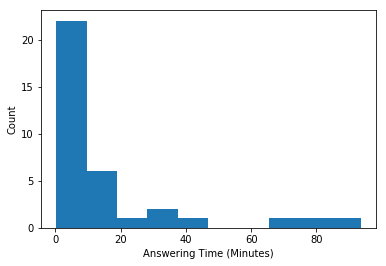

In [10]:
fig, ax = plt.subplots()
im = ax.hist(QAtimes)
plt.xlabel('Answering Time (Minutes)')
plt.ylabel('Count')
fig.savefig('./static/Hist.png', dpi = 600)

In [11]:
score

4.0